## Preprocessing
1. 30초의 EEG(3000샘플)의 데이터에 25초 뒤의 BIS값을 대응되도록 만든다.
2. 이때 BIS값과 동일한 시점의 SQI > threshold 인 구간만 선택한다. (예: SQI > 90)
3. (옵션) 마취시작 30분 이후의 데이터만 선택한다.
4. 불균형하게 존재하는 BIS 값들을 일정하게 존재하도록 랜덤 샘플링한다.

In [1]:
import os, glob
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt

import multiprocessing
from functools import partial 
import time

from jk import preprocessing


In [6]:
PATH = r'../data/vitaldb/raw/*.npy'
file_path_li = glob.glob(PATH)
train_path_li = file_path_li[:700]
test_path_li = file_path_li[700:900]
val_path_li = file_path_li[900:]
# file_path_li

In [7]:
# for file in file_li:
#     arr = np.load(os.path.join(PATH, file))    
#     print(arr.shape)
#     df = pd.DataFrame(arr, columns=['BIS', 'SQI', 'EEG'])
#     print(df.isnull().sum())
#     print("="*20)
#     df['EEG'].fillna(method='ffill', inplace=True)
#     df['EEG'].fillna(method='bfill', inplace=True)    
#     #df['EEG'].fillna(10, inplace=True)
#     print(df.isnull().sum())

(1153701, 3)


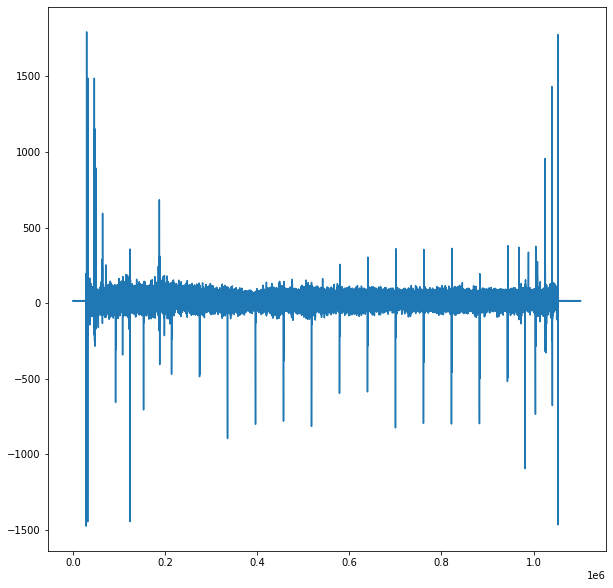

In [8]:
arr = np.load(file_path_li[80])    
print(arr.shape)
df = pd.DataFrame(arr, columns=['BIS', 'SQI', 'EEG'])
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(df["EEG"])
#ax.legend()
ax.grid
plt.show()

In [9]:
def getDataset(file_path_li):
    # row : Time  |  columns : ['BIS/BIS', 'BIS/SQI', 'BIS/EEG1_WAV'] 
    EEG_li = []
    BIS_li = []
    # EEG_data = []
    # BIS_data = []

    for i, file_path in enumerate(tqdm(file_path_li)):  
        arr = np.load( file_path )    
        df = pd.DataFrame(arr, columns=['BIS', 'SQI', 'EEG'])    
#         df['EEG'].fillna(method='ffill', inplace=True)
#         df['EEG'].fillna(method='bfill', inplace=True)    
        df['Time'] = np.arange(df.shape[0])/100
#         print(str(i) + " " + file)    
#         print(df.isnull().sum())    
#         if(df['EEG'].isnull().sum()>0):
#             print(file + " Warning!!!! " + str(df['EEG'].isnull().sum())    )
#             continue
        BIS_indices = df[ (df['BIS'].notnull()) & (df['Time']>=1800.0) & (df['SQI']>90.0) ].index    

        for j, index in enumerate(BIS_indices):    
            EEG = df['EEG'].to_numpy()[1+index-55*100:1+index-25*100]                        
            BIS = df['BIS'].to_numpy()[index]
            if np.isnan(EEG).sum()>0:
#                 print(str(i) +' '+ str(index) + "EEG has nan." + str(np.isnan(EEG).sum()) )
                continue
            EEG_li.append(EEG.reshape(30*100, 1))
            BIS_li.append([BIS])

    #         if i==0 and j==0:
    #             EEG_data = EEG.reshape(1, 30*100, 1)
    #             BIS_data = np.array(BIS).reshape(1, 1)
    #         else:
    #             EEG_data = np.concatenate( (EEG_data, EEG.reshape(1, 30*100, 1)), axis=0)
    #             BIS_data = np.concatenate( (BIS_data, np.array(BIS).reshape(1, 1)), axis=0)

    #     print(df.shape)
    return  np.array(EEG_li), np.array(BIS_li) 

In [11]:
save_path = "../data/vitaldb"

EEG, BIS = getDataset(train_path_li)
print(EEG.shape)
print(BIS.shape)
np.save(os.path.join(save_path, 'TrainEEG.npy'), EEG)
np.save(os.path.join(save_path, 'TrainBIS.npy'), BIS)
EEG = []
BIS = []
print("="*50)

EEG, BIS = getDataset(test_path_li)
print(EEG.shape)
print(BIS.shape)
np.save(os.path.join(save_path, 'TestEEG.npy'), EEG)
np.save(os.path.join(save_path, 'TestBIS.npy'), BIS)
EEG = []
BIS = []
print("="*50)

EEG, BIS = getDataset(val_path_li)
print(EEG.shape)
print(BIS.shape)
np.save(os.path.join(save_path, 'ValEEG.npy'), EEG)
np.save(os.path.join(save_path, 'ValBIS.npy'), BIS)
EEG = []
BIS = []
print("="*50)

100%|████████████████████████████████████████████████████████████████████████████████| 700/700 [04:48<00:00,  2.42it/s]


(3591581, 3000, 1)
(3591581, 1)


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [01:17<00:00,  2.58it/s]


(1114954, 3000, 1)
(1114954, 1)


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.36it/s]


(506962, 3000, 1)
(506962, 1)
